<a href="https://colab.research.google.com/github/GeminiNetSailor/Data-science-and-analytics/blob/Actividad-5/5.2%20Actividad%205.%20Preprocesamiento/Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: David A. Serrano García
*   MATRÍCULA: A01795935

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 5/Actividad5_Preprocesamiento"
os.chdir(DIR)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [5]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [6]:
numeric_summary = response_df.describe()
numeric_summary

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [7]:
categorical_summary = response_df.describe(include=['float64','int64'])
categorical_summary

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [8]:
categorical_summary = response_df.describe(include=[object])
categorical_summary

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


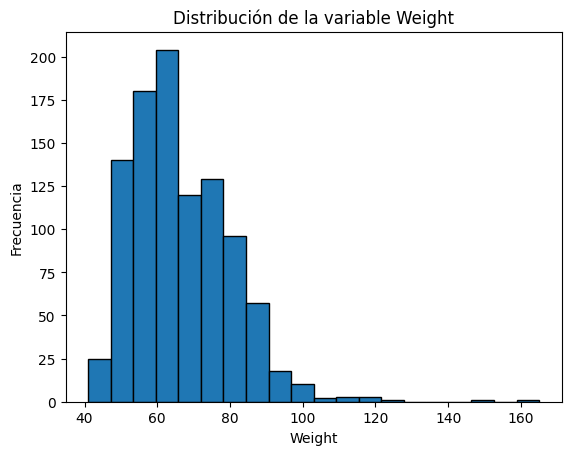

In [9]:
plt.hist(response_df['Weight'].dropna(), bins=20, edgecolor='black')
plt.title('Distribución de la variable Weight')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.show()

Usamos un histograma para la variable Weight porque:

1. Es una variable cuantitativa continua.
2. Nos permite observar la frecuencia de los valores y detectar
3. Queremos visualizar la distribución de los datos.
4. patrones como sesgos y valores atípicos.



3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [10]:
skewness = response_df['Weight'].skew()
skewness

1.2237251927527477

**Sesgada a la derecha (positivamente sesgada)**


- Si skewness > 0, la distribución está sesgada a la derecha (positivamente sesgada)
- Si skewness < 0, la distribución está sesgada a la izquierda (negativamente sesgada)
- Si skewness ≈ 0, la distribución es simétrica

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [11]:
# Número de valores faltantes en la variable Weight
missing_values = response_df['Weight'].isna().sum()

# Porcentaje de valores faltantes
missing_percentage = (missing_values / len(response_df)) * 100

# Imprimir los resultados
print(f'Número de valores faltantes en la variable Weight: {missing_values}')
print(f'Porcentaje de valores faltantes en la variable Weight: {missing_percentage:.2f}%')

Número de valores faltantes en la variable Weight: 20
Porcentaje de valores faltantes en la variable Weight: 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [12]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [13]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


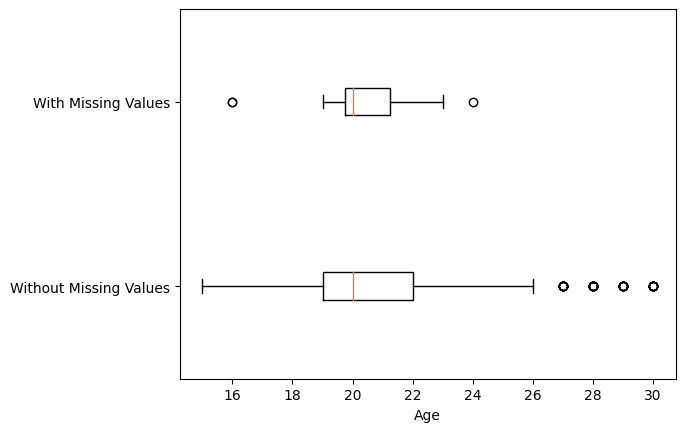

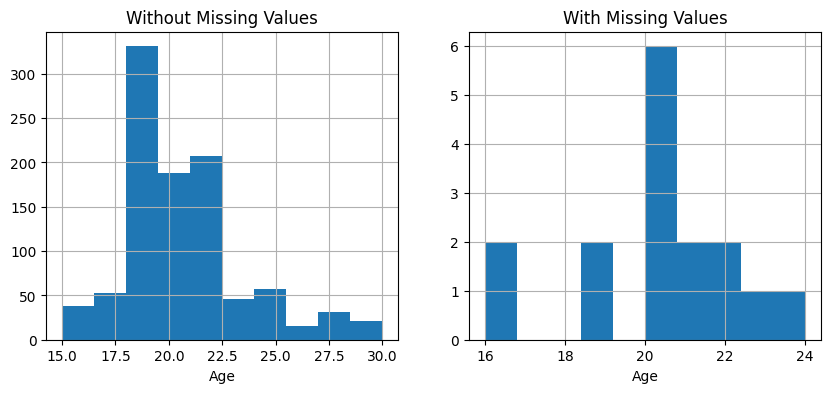

p-value of t-test: 0.7258243979822129
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Number of siblings:


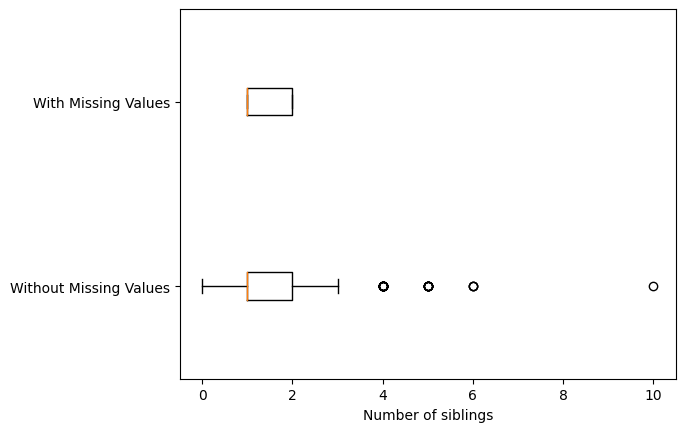

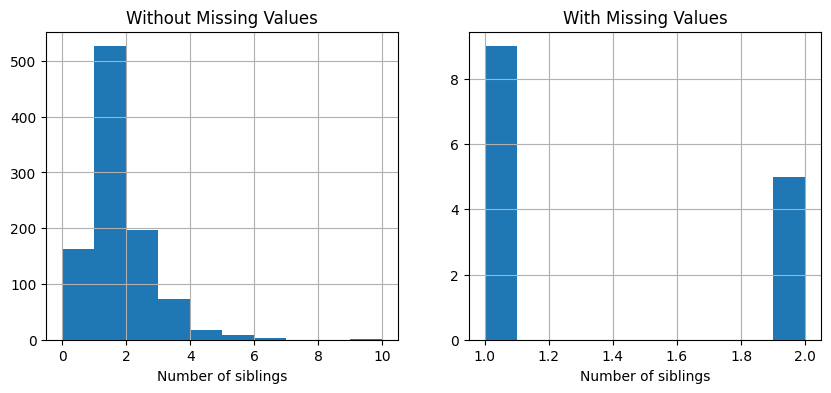

p-value of t-test: 0.8255092107556896
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [14]:
numerical_attributes = ['Age', 'Number of siblings']
BM_MV = response_df['Weight'].isna()

for att in numerical_attributes:
    print(f'Diagnosis Analysis of Missing Values for {att}:')
    Diagnose_MV_Numerical(response_df, att, BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')



6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [15]:
# Medida de tendencia central recomendada: mediana (menos sensible a valores atípicos)

# Valores faltantes
missing_values_after_imputation = response_df['Weight'].isna().sum()
print(f'Valores faltantes en Weight: {missing_values_after_imputation}')

# Calcular la mediana de Weight
median_weight = response_df['Weight'].median()
print(f'Mediana de Weight: {median_weight}')

# Imputar valores faltantes con la mediana
response_df['Weight'].fillna(median_weight, inplace=True)

# Verificar que no hay valores faltantes
missing_values_after_imputation = response_df['Weight'].isna().sum()
print(f'Valores faltantes en Weight después de la imputación: {missing_values_after_imputation}')

Valores faltantes en Weight: 20
Mediana de Weight: 64.0
Valores faltantes en Weight después de la imputación: 0


7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

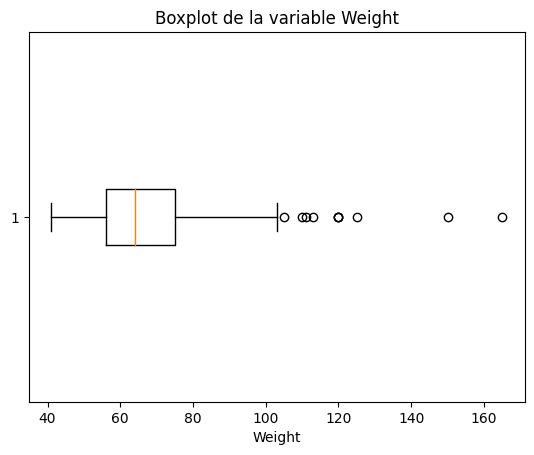

In [16]:
# Boxplot para identificar valores atípicos
plt.boxplot(response_df['Weight'].dropna(), vert=False)
plt.title('Boxplot de la variable Weight')
plt.xlabel('Weight')
plt.show()

In [17]:
# Calcular los límites de los valores atípicos
Q1_weight = response_df['Weight'].quantile(0.25)
Q3_weight = response_df['Weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

In [18]:
# Identificar y contar valores atípicos
outliers_weight = response_df[(response_df['Weight'] < lower_bound_weight) | (response_df['Weight'] > upper_bound_weight)]
outliers_count_weight = outliers_weight.shape[0]
print(f'Número de valores atípicos en Weight: {outliers_count_weight}')

Número de valores atípicos en Weight: 10


In [19]:
# Almacenar valores atípicos en un dataframe independiente
outliers_weight_df = outliers_weight.copy()
print(f'Dimensiones del dataframe de valores atípicos: {outliers_weight_df.shape}')

Dimensiones del dataframe de valores atípicos: (10, 150)


In [20]:
# Eliminar valores atípicos del conjunto original
response_df = response_df[~response_df.index.isin(outliers_weight.index)]
#print(f'Dimensiones del dataframe original después de eliminar los valores atípicos: {response_df_clean.shape}')

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

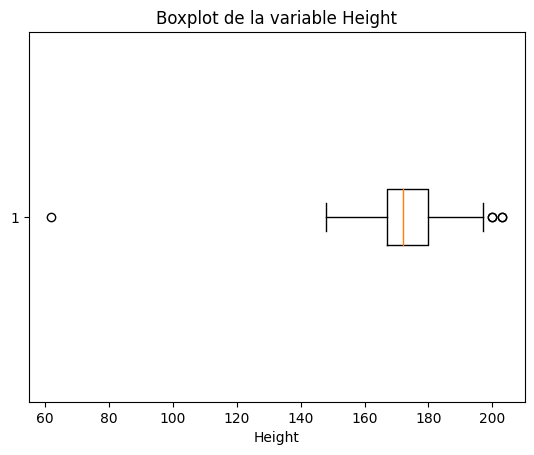

In [21]:
# Boxplot para identificar valores atípicos
plt.boxplot(response_df['Height'].dropna(), vert=False)
plt.title('Boxplot de la variable Height')
plt.xlabel('Height')
plt.show()

In [22]:
# Calcular los límites de los valores atípicos
Q1_height = response_df['Height'].quantile(0.25)
Q3_height = response_df['Height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

In [23]:
# Identificar y contar valores atípicos
outliers_height = response_df[(response_df['Height'] < lower_bound_height) | (response_df['Height'] > upper_bound_height)]
outliers_count_height = outliers_height.shape[0]
print(f'Número de valores atípicos en Height: {outliers_count_height}')

Número de valores atípicos en Height: 5


In [24]:
# Almacenar valores atípicos en un dataframe independiente
outliers_height_df = outliers_height.copy()
print(f'Dimensiones del dataframe de valores atípicos: {outliers_height_df.shape}')

Dimensiones del dataframe de valores atípicos: (5, 150)


In [25]:
# Eliminar valores atípicos del conjunto original
response_df = response_df[~response_df.index.isin(outliers_height.index)]
#print(f'Dimensiones del dataframe original después de eliminar los valores atípicos: {response_df_clean.shape}')

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [26]:
# Convertir la altura de centímetros a metros
response_df['Height_m'] = response_df['Height'] / 100

<ipython-input-26-10e039b6cfa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Height_m'] = response_df['Height'] / 100


In [27]:
# Calcular el BMI
response_df['BMI'] = response_df['Weight'] / (response_df['Height_m'] ** 2)

<ipython-input-27-48ae57a43edd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['BMI'] = response_df['Weight'] / (response_df['Height_m'] ** 2)


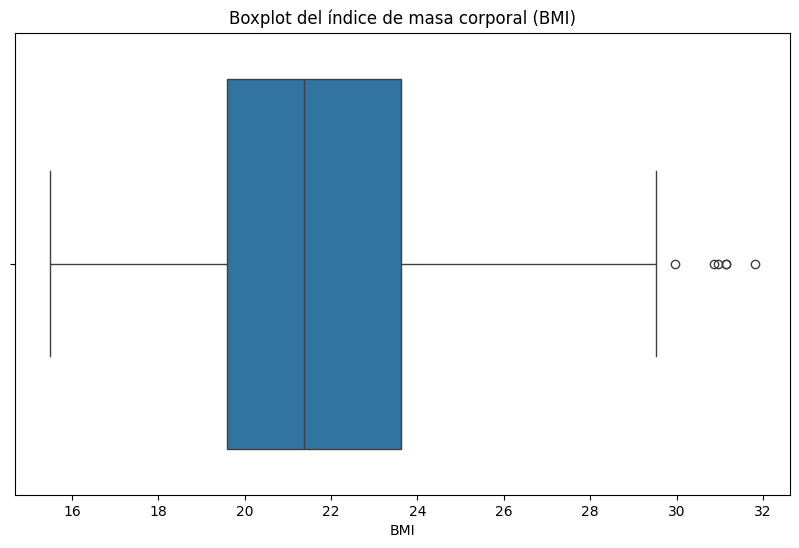

(6, (6, 152))

In [28]:
# Boxplot para identificar valores atípicos en BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x=response_df['BMI'])
plt.title('Boxplot del índice de masa corporal (BMI)')
plt.xlabel('BMI')
plt.show()

# Calcular los límites de los valores atípicos
Q1_BMI = response_df['BMI'].quantile(0.25)
Q3_BMI = response_df['BMI'].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI

lower_bound_BMI = Q1_BMI - 1.5 * IQR_BMI
upper_bound_BMI = Q3_BMI + 1.5 * IQR_BMI

# Identificar y contar valores atípicos en BMI
outliers_BMI = response_df[(response_df['BMI'] < lower_bound_BMI) | (response_df['BMI'] > upper_bound_BMI)]
outliers_count_BMI = outliers_BMI.shape[0]

# Almacenar valores atípicos en un dataframe independiente
outliers_BMI_df = outliers_BMI.copy()

outliers_count_BMI, outliers_BMI_df.shape

Sí hay encuestados que sean atípicos según su índice de masa corporal (BMI)

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

In [29]:
# Extraer los nombres de las variables categóricas
categorical_columns = categorical_summary.columns.tolist()
print(f'Variables categóricas: {categorical_columns}')

Variables categóricas: ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']


In [30]:
#filtered_response_df = response_df[(response_df['BMI'] >= lower_bound_BMI) & (response_df['BMI'] <= upper_bound_BMI)]

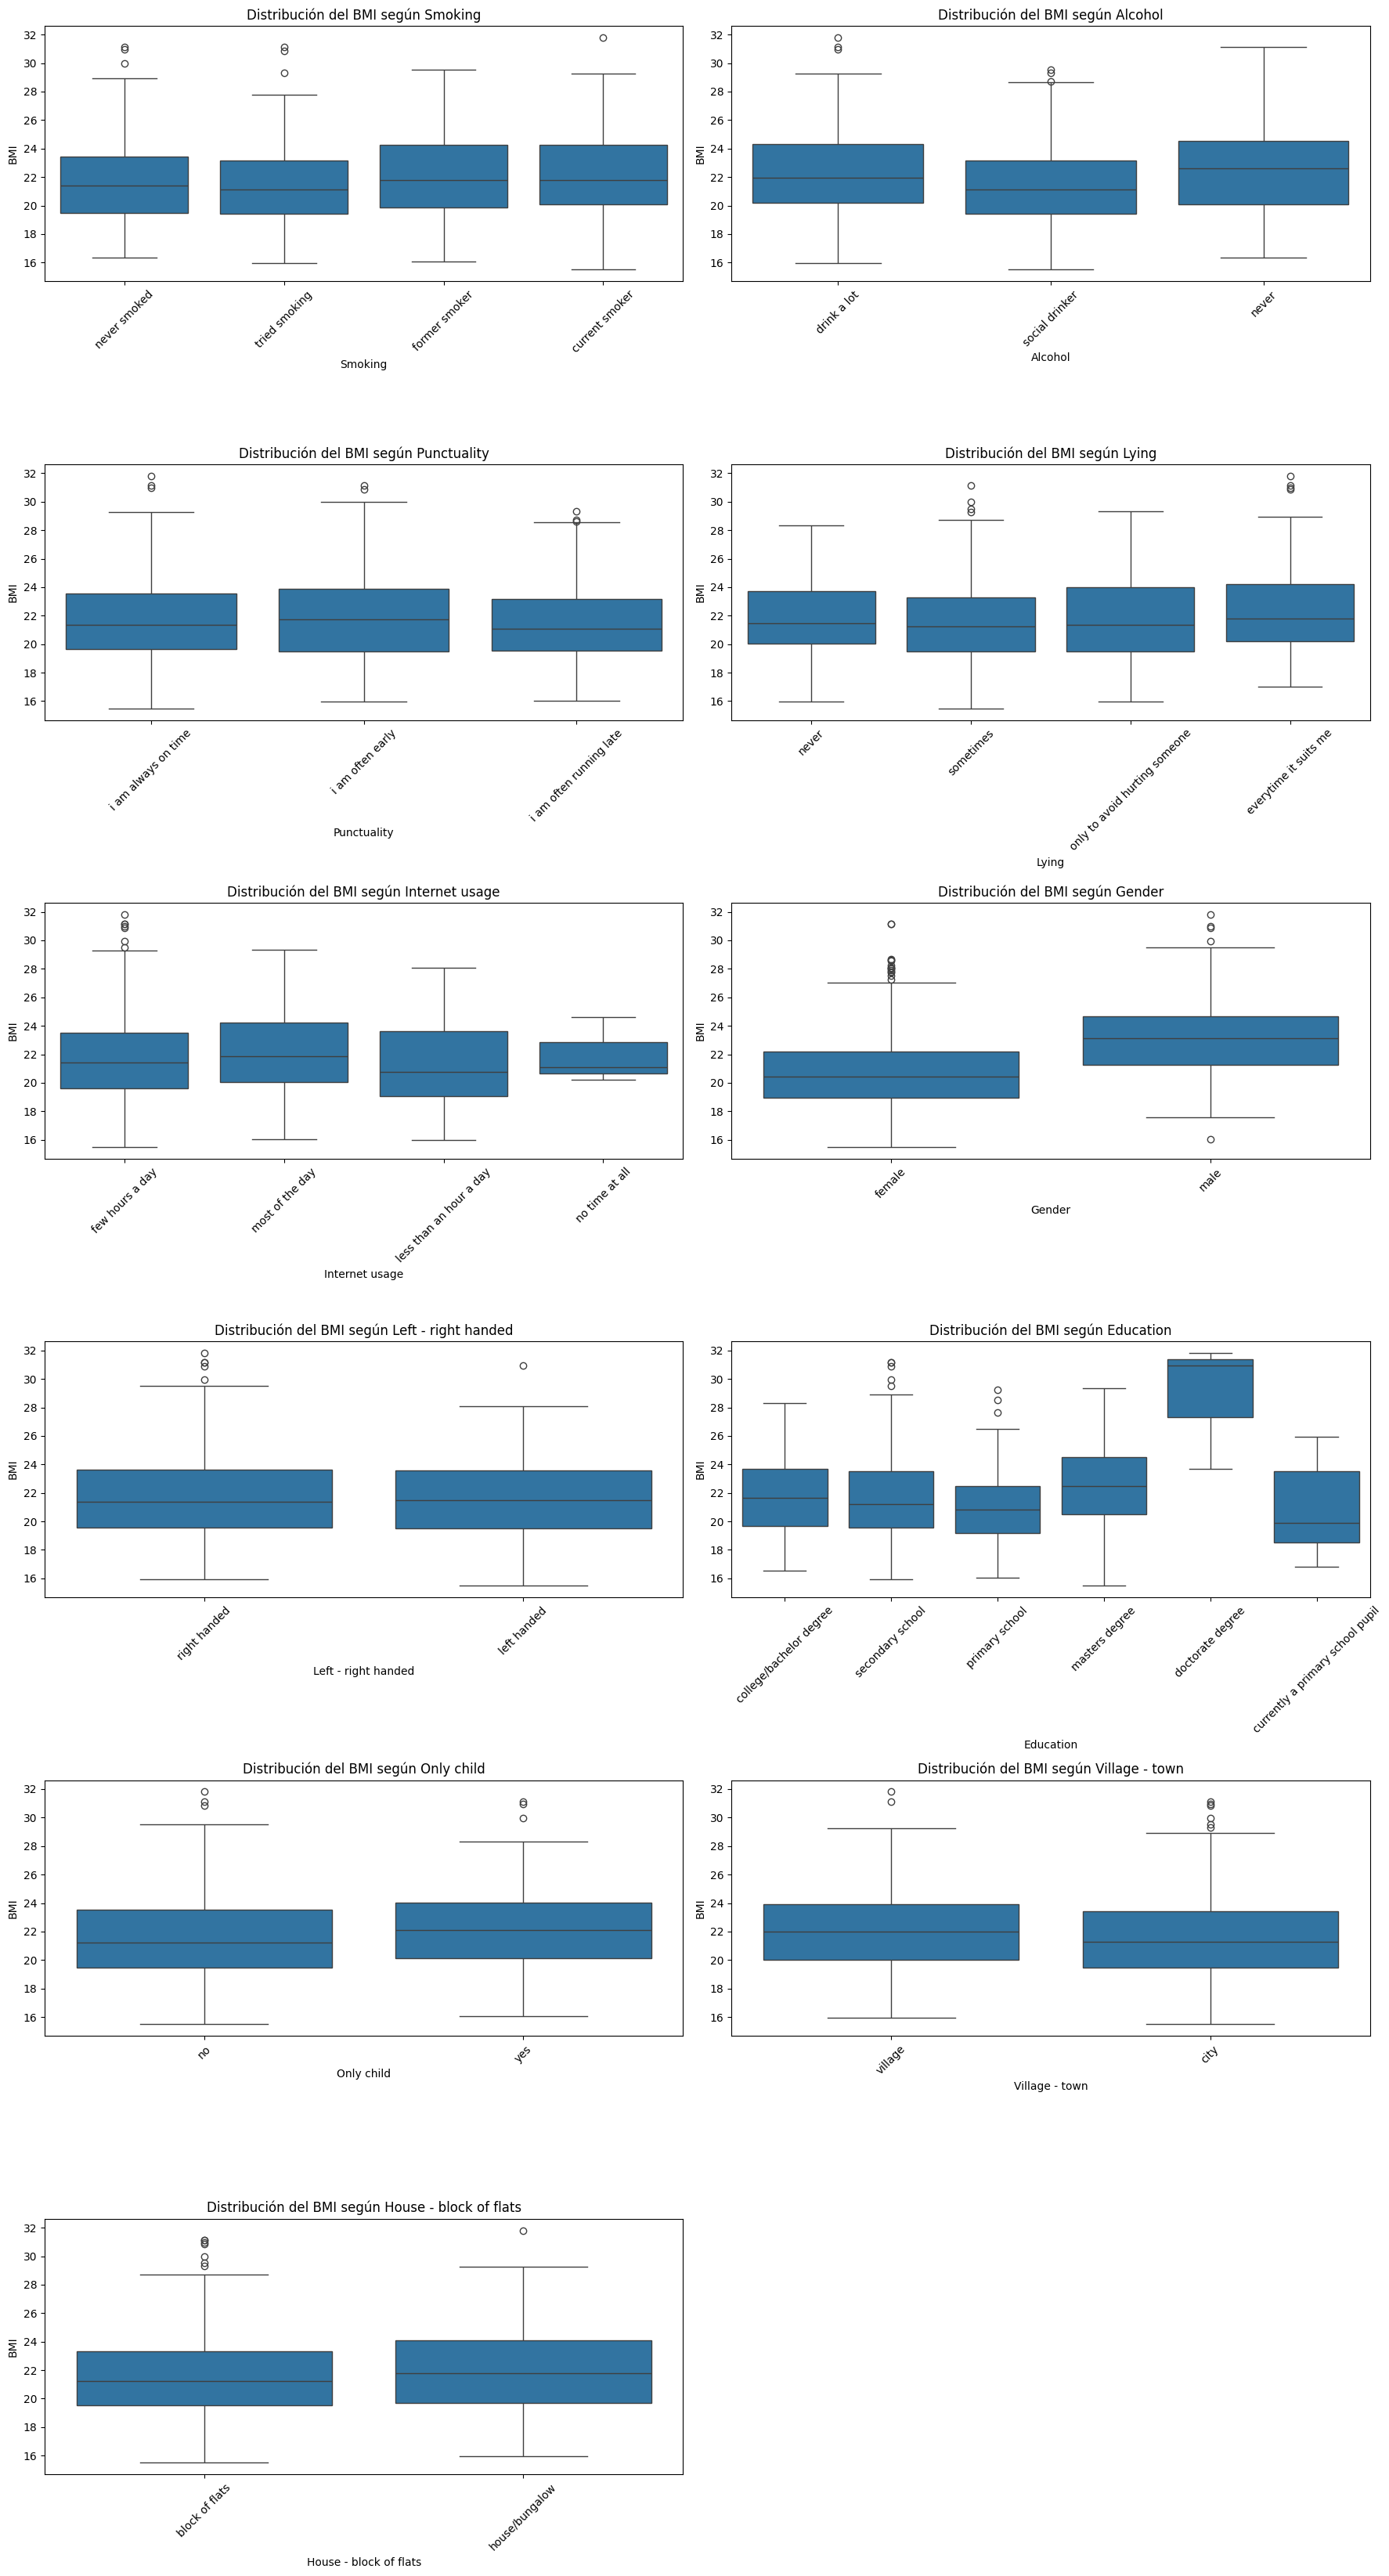

In [31]:
# Crear boxplots para cada variable categórica sin valores extremos
num_plots = len(categorical_columns)
fig, axes = plt.subplots(nrows=(num_plots // 2) + 1, ncols=2, figsize=(18, num_plots * 3))

# Asegurarse de que los ejes están en una matriz 2D
axes = axes.flatten()

# Crear un boxplot para cada variable categórica
for i, column in enumerate(categorical_columns):
    sns.boxplot(x=column, y='BMI', data=response_df, ax=axes[i])
    axes[i].set_title(f'Distribución del BMI según {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('BMI')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si hay un número impar de subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [32]:
Las diferencias en el nivel educativo son notables, indicando que este puede ser un factor que puede influir significativamente en el BMI.

SyntaxError: invalid syntax (<ipython-input-32-033aad1333e2>, line 1)